In [39]:
try:
    import networkx as nx
    import matplotlib.pyplot as plt
    from IPython.display import SVG
    import numpy as np
    from graphviz import Graph, Digraph
    import keras
    import sys
    import tensorflow
    # from tensorflow.keras.utils import plot_model
    from keras import layers
    sys.path.append('/opt/homebrew/bin')
except Exception as e:
    print(e)
    !source requirements.sh 2>/dev/null >/dev/null

In [40]:

def genNN(n):
    DG = nx.DiGraph()
    for i in range(n):  
        DG.add_node(i,subset=1)
    for i in range(n-1):  
        DG.add_weighted_edges_from([(i,i+1 , 0.5)])
    return DG

In [41]:
def genNN(n, h=0, o=0, isSimple=True):
    DG = nx.DiGraph()
   
    if isSimple:
        for i in range(n):  
            DG.add_node(i,subset=1, label='Input')
        for i in range(n-1):  
            DG.add_weighted_edges_from([(i,i+1 , 0.5)])
        return DG
    else:
        for i in range(n):  
            DG.add_node(i,subset=0, type='Input')
        for i in range(n, h+n):
            DG.add_node(i,subset=n, type='Hidden')

        for i in range(n+h,n+h+o):
            DG.add_node(i,subset=n+h, type='Output')
    ty = nx.get_node_attributes(DG,'type')
    ins = [k for k,v in ty.items() if v == 'Input' ]
    hs = [k for k,v in ty.items() if v == 'Hidden' ]
    outs = [k for k,v in ty.items() if v == 'Output' ]
    if h != 0:
        for i in ins:
            for j in hs:
                DG.add_weighted_edges_from([(i, j, 0.5)])
    else:
        for i in ins:
            for j in outs:
                DG.add_weighted_edges_from([(i, j, 0.5)]) 
        
        for i in hs:
            for j in outs:
                DG.add_weighted_edges_from([(i, j, 0.5)])
    
    return DG, ins, hs, outs

In [42]:
def plotNN(DG,nodes=[],isSimple=True,width=4, height=2):
    title = f"Neural Network with {len(DG.nodes)} nodes\nand {len(DG.edges)} edge"
    fig, ax = plt.subplots(figsize=(width, height))
    fig.tight_layout()
    title = ax.set_title(title)
    title.set_color('darkblue')
    nLabels = {n: "$a^{(" + str(n) + ")}$" for n in DG.nodes()}
    options = {
        'node_color': 'lightblue',
        'node_size': 800,
        'labels': nLabels,
        'font_color': 'lightblue',
        'edge_color': 'darkviolet',
        'width': 1,
    }
    nLOptions = {
        'font_color': 'blue',
    }
    eLOptions = {'font_color': 'green', 'font_size': 'small'}

    eLabels = {(n1, n2): "$\omega_{" + f"{n2}{n1}" + "}=" + str(w) + "$"
               for n1, n2, w in DG.edges.data('weight')}
    if isSimple:
        pos = nx.multipartite_layout(DG, align='horizontal')
    else:
        # pos=nx.kamada_kawai_layout(DG)
        pos = nx.bipartite_layout(DG,nodes=nodes, align='horizontal')
    edgePos = {k: np.array([v[0], v[1] - .003]) for k, v in pos.items()}
    nodePos = {k: np.array([v[0] + .1, v[1] + .006]) for k, v in pos.items()}

    nodes = nx.draw(DG, pos=pos, **options, ax=ax)
    nx.draw_networkx_labels(DG, pos=nodePos, labels=nLabels, **nLOptions)
    elPos = nx.draw_networkx_edge_labels(DG,
                                         pos=edgePos,
                                         edge_labels=eLabels,
                                         **eLOptions)
    return fig, ax


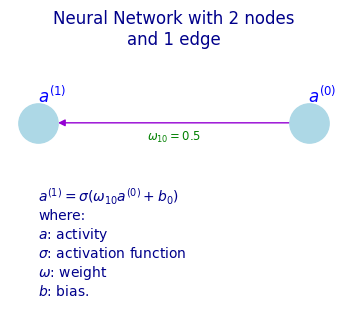

In [43]:
DG = genNN(2)

fig, ax = plotNN(DG ,width=4, height=2)
tex = "$a^{(1)} = \sigma(\omega_{10}{a^{(0)}}+b_0)$\n"
tex += "where:\n"
tex += "$a$: activity\n"
tex += "$\sigma$: activation function\n"
tex += "$\omega$: weight\n"
tex += "$b$: bias.\n"
text = ax.text(-1, -0.042, tex, c='darkblue')

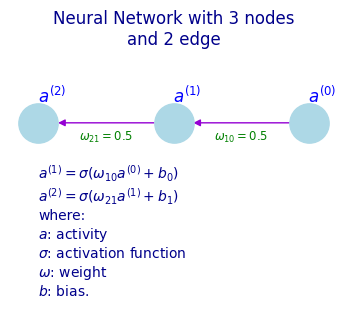

In [44]:
DG = genNN(3)
fig, ax = plotNN(DG, width=4, height=2)
tex = "$a^{(1)} = \sigma(\omega_{10}{a^{(0)}}+b_0)$\n"
tex += "$a^{(2)} = \sigma(\omega_{21}{a^{(1)}}+b_1)$\n"
tex += "where:\n"
tex += "$a$: activity\n"
tex += "$\sigma$: activation function\n"
tex += "$\omega$: weight\n"
tex += "$b$: bias.\n"
text = ax.text(-1, -0.042, tex, c='darkblue')

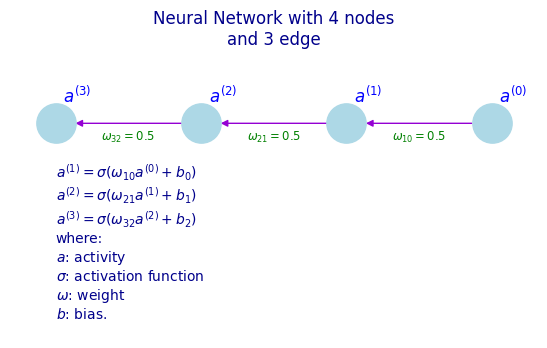

In [45]:
DG = genNN(4)
fig, ax = plotNN(DG, width=6, height=2)
tex = "$a^{(1)} = \sigma(\omega_{10}{a^{(0)}}+b_0)$\n"
tex += "$a^{(2)} = \sigma(\omega_{21}{a^{(1)}}+b_1)$\n"
tex += "$a^{(3)} = \sigma(\omega_{32}{a^{(2)}}+b_2)$\n"
tex += "where:\n"
tex += "$a$: activity\n"
tex += "$\sigma$: activation function\n"
tex += "$\omega$: weight\n"
tex += "$b$: bias.\n"
text = ax.text(-1, -0.047, tex, c='darkblue')

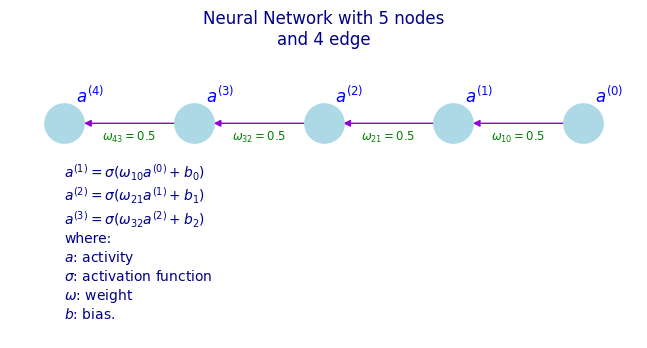

In [46]:
DG = genNN(5)
fig, ax = plotNN(DG, width=7, height=2)
tex = "$a^{(1)} = \sigma(\omega_{10}{a^{(0)}}+b_0)$\n"
tex += "$a^{(2)} = \sigma(\omega_{21}{a^{(1)}}+b_1)$\n"
tex += "$a^{(3)} = \sigma(\omega_{32}{a^{(2)}}+b_2)$\n"
tex += "where:\n"
tex += "$a$: activity\n"
tex += "$\sigma$: activation function\n"
tex += "$\omega$: weight\n"
tex += "$b$: bias.\n"
text = ax.text(-1, -0.047, tex, c='darkblue')

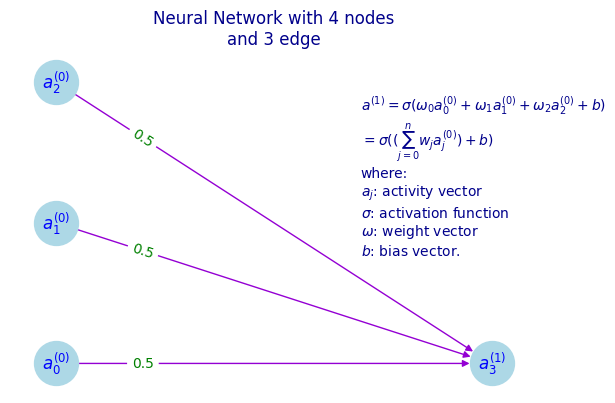

In [47]:
DG, ins, hs, outs= genNN(3,0,1, isSimple=False)
itr = 0
isSimple=False
width=6
height=4

title = f"Neural Network with {len(DG.nodes)} nodes\nand {len(DG.edges)} edge"
fig, ax = plt.subplots(figsize=(width, height))
fig.tight_layout()
title = ax.set_title(title)
title.set_color('darkblue')
nLabels = {n: "$a_{"+str(n)+"}^{(" + str(itr) + ")}$" for n in ins + hs}
nLabelsout = {n: "$a_{"+str(n)+"}^{(" + str(itr+1) + ")}$" for n in outs}
nLabels.update(nLabelsout)
options = {
'node_color': 'lightblue',
'node_size': 1000,
'labels': nLabels,
'font_color': 'lightblue',
'edge_color': 'darkviolet',
'width': 1,
'with_labels':True,
'font_size': 'small'
}
nLOptions = {
'font_color': 'blue',
}
eLOptions = {'font_color': 'green', 'font_size': 'medium',
             'label_pos':.8}

eLabels = {(n1, n2): str(w)
    for n1, n2, w in DG.edges.data('weight')}
if isSimple:
    pos = nx.multipartite_layout(DG, align='horizontal')
else:
    pos=nx.bipartite_layout(DG,nodes=ins, align='vertical')
edgePos = {k: np.array([v[0], v[1] ]) for k, v in pos.items()}
nodePos = {k: np.array([v[0]+.001 , v[1]+.001 ]) for k, v in pos.items()}

nx.draw(DG,pos=pos,**options)
nx.draw_networkx_labels(DG, pos=nodePos, labels=nLabels, **nLOptions);
elPos = nx.draw_networkx_edge_labels(DG,pos=pos,
                                edge_labels=eLabels,
                                **eLOptions)
tex = "$a^{(1)} = \sigma(\omega_{0}{a_0^{(0)}}+\omega_{1}{a_1^{(0)}}+\omega_{2}{a_2^{(0)}} + b)$\n"
tex += "$=\sigma((\sum_{j=0}^{n} w_ja_j^{(0)})+b)$\n"
tex += "where:\n"
tex += "$a_j$: activity vector\n"
tex += "$\sigma$: activation function\n"
tex += "$\omega$: weight vector\n"
tex += "$b$: bias vector.\n"
text = ax.text(.6, -0.047, tex, c='darkblue')


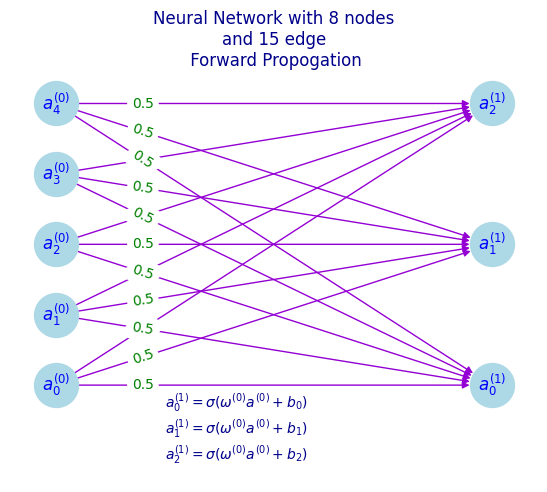

In [48]:
DG, ins, hs, outs= genNN(5,0,3, isSimple=False)
itr = 0
isSimple=False
width=6
height=4

title = f"Neural Network with {len(DG.nodes)} nodes\nand {len(DG.edges)} edge\n Forward Propagation"
fig, ax = plt.subplots(figsize=(width, height))
fig.tight_layout()
title = ax.set_title(title)
title.set_color('darkblue')
nLabels = {n: "$a_{"+str(n)+"}^{(" + str(itr) + ")}$" for n in ins + hs}
nLabelsout = {n: "$a_{"+str(i)+"}^{(" + str(itr+1) + ")}$" for i, n in enumerate(outs)}
nLabels.update(nLabelsout)
options = {
'node_color': 'lightblue',
'node_size': 1000,
'labels': nLabels,
'font_color': 'lightblue',
'edge_color': 'darkviolet',
'width': 1,
'with_labels':True,
'font_size': 'small'
}
nLOptions = {
'font_color': 'blue',
}
eLOptions = {'font_color': 'green', 'font_size': 'medium',
             'label_pos':.8}

eLabels = {(n1, n2): str(w)
    for n1, n2, w in DG.edges.data('weight')}
if isSimple:
    pos = nx.multipartite_layout(DG, align='horizontal')
else:
    pos=nx.bipartite_layout(DG,nodes=ins, align='vertical')
edgePos = {k: np.array([v[0], v[1] ]) for k, v in pos.items()}
nodePos = {k: np.array([v[0]+.001 , v[1]+.001 ]) for k, v in pos.items()}

nx.draw(DG,pos=pos,**options)
nx.draw_networkx_labels(DG, pos=nodePos, labels=nLabels, **nLOptions);
elPos = nx.draw_networkx_edge_labels(DG,pos=pos,
                                edge_labels=eLabels,
                                **eLOptions)
tex = "$a_0^{(1)} = \sigma(\omega^{(0)}{a^{(0)}}+ b_0)$\n"
tex +="$a_1^{(1)} = \sigma(\omega^{(0)}{a^{(0)}}+ b_1)$\n"
tex +="$a_2^{(1)} = \sigma(\omega^{(0)}{a^{(0)}}+ b_2)$\n"

# tex += "where:\n"
# tex += "$a_j$: activity vector\n"
# tex += "$\sigma$: activation function\n"
# tex += "$\omega$: weight matrix\n"
# tex += "$b$: bias vector.\n"
text = ax.text(-.2, -1., tex, c='darkblue')

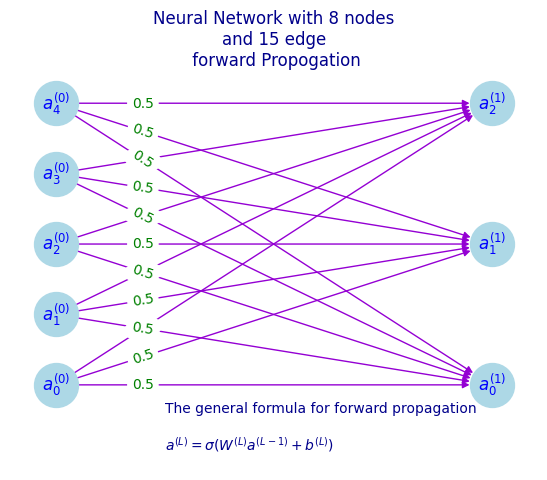

In [59]:
DG, ins, hs, outs= genNN(5,0,3, isSimple=False)
itr = 0
isSimple=False
width=6
height=4

title = f"Neural Network with {len(DG.nodes)} nodes\nand {len(DG.edges)} edge\n forward Propagation"
fig, ax = plt.subplots(figsize=(width, height))
fig.tight_layout()
title = ax.set_title(title)
title.set_color('darkblue')
nLabels = {n: "$a_{"+str(n)+"}^{(" + str(itr) + ")}$" for n in ins + hs}
nLabelsout = {n: "$a_{"+str(i)+"}^{(" + str(itr+1) + ")}$" for i, n in enumerate(outs)}
nLabels.update(nLabelsout)
options = {
'node_color': 'lightblue',
'node_size': 1000,
'labels': nLabels,
'font_color': 'lightblue',
'edge_color': 'darkviolet',
'width': 1,
'with_labels':True,
'font_size': 'small'
}
nLOptions = {
'font_color': 'blue',
}
eLOptions = {'font_color': 'green', 'font_size': 'medium',
             'label_pos':.8}

eLabels = {(n1, n2): str(w)
    for n1, n2, w in DG.edges.data('weight')}
if isSimple:
    pos = nx.multipartite_layout(DG, align='horizontal')
else:
    pos=nx.bipartite_layout(DG,nodes=ins, align='vertical')
edgePos = {k: np.array([v[0], v[1] ]) for k, v in pos.items()}
nodePos = {k: np.array([v[0]+.001 , v[1]+.001 ]) for k, v in pos.items()}

nx.draw(DG,pos=pos,**options)
nx.draw_networkx_labels(DG, pos=nodePos, labels=nLabels, **nLOptions);
elPos = nx.draw_networkx_edge_labels(DG,pos=pos,
                                edge_labels=eLabels,
                                **eLOptions)
tex = "The general formula for forward propagation\n\n"

tex += "$a^{(L)} = \sigma(W^{(L)}{a^{(L-1)}}+ b^{(L)})$\n"


# tex += "where:\n"
# tex += "$a_j$: activity vector\n"
# tex += "$\sigma$: activation function\n"
# tex += "$\omega$: weight matrix\n"
# tex += "$b$: bias vector.\n"
text = ax.text(-.2, -.95, tex, c='darkblue')

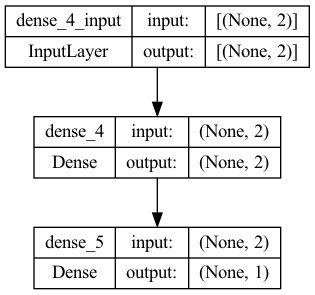

In [50]:
model = keras.models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

dot_img_file = 'model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

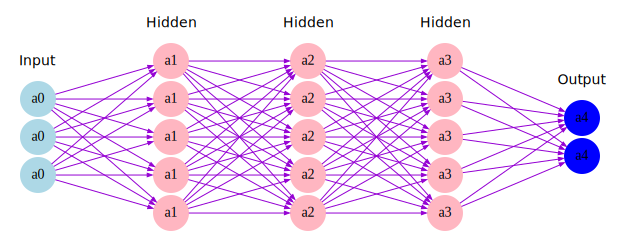

In [51]:

layers = [3, 5, 5, 5, 2]
color = ['lightblue','lightpink', 'blue']
node_size = 1200
layers_str = ["Input"] + ["Hidden"] * (len(layers) - 2) + ["Output"]
layers_col = ["none"] + ["none"] * (len(layers) - 2) + ["none"]
layers_fill = [color[0]] + [color[1]] * (len(layers) - 2) + [color[-1]]

penwidth = 0
font = "Hilda 14"
text = ''
text += ("digraph G {\n")
text += ("\tfontname = \"{}\"\n".format(font))
text += ("\trankdir=LR\n")
text += ("\tsplines=line\n")
text += ("\tnodesep=.03;\n")
text += ("\tranksep=1.3;\n")
text += ("\tedge [color=darkviolet, arrowsize=.5];\n")
text += ("\tnode [fixedsize=true,label=\"\",style=filled," + \
    "color=none,fillcolor=lighblue,shape=circle]\n")

# Clusters
for i in range(0, len(layers)):
    text += (("\tsubgraph cluster_{} {{".format(i)))
    text += (("\t\tcolor={};\n".format(layers_col[i])))
    text += (("\t\tnode [label=a{}, size={},style=filled, color=lightpink, penwidth={},"
          "fillcolor={} shape=circle];\n".format(
            i,
            node_size,
              penwidth,
              layers_fill[i])))

    text += ("\t\t\n")

    for a in range(layers[i]):
        text += "l{}{} ".format(i + 1, a)

    text += (";")
    text += (("\t\tlabel = {};\n".format(layers_str[i])))

    text += ("\t}\n")

# Nodes
for i in range(1, len(layers)):
    for a in range(layers[i - 1]):
        for b in range(layers[i]):
            text += ("\tl{}{} -> l{}{}\n".format(i, a, i + 1, b))

text += ("}\n")
with open('out','w') as f:
    f.write(text)
!dot -Tsvg -O out
SVG('out.svg')


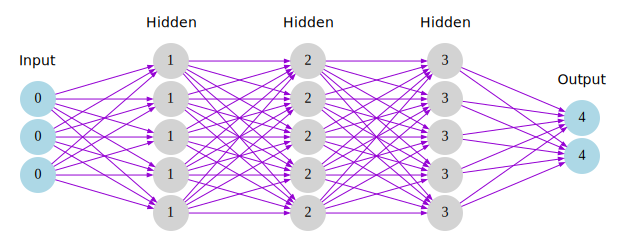

In [52]:



def generateNN(layers, colors ,args):
    if 'node_size' in args:
        try:
            node_size = int(args[node_size])
        except Exception:
            node_size = 1200
    else:
        node_size = 1200

layers = [3, 5, 5, 5, 2]

layers_str = ["Input"] + ["Hidden"] * (len(layers) - 2) + ["Output"]
layers_col = ["none"] + ["none"] * (len(layers) - 2) + ["none"]
layers_fill = ["lightblue"] + ["lightgray"] * (len(layers) - 2) + ["lightblue"]

penwidth = 0
font = "Hilda 14"
text = ''
text += ("digraph G {\n")
text += ("\tfontname = \"{}\"\n".format(font))
text += ("\trankdir=LR\n")
text += ("\tsplines=line\n")
text += ("\tnodesep=.03;\n")
text += ("\tranksep=1.3;\n")
text += ("\tedge [color=darkviolet, arrowsize=.5];\n")
text += ("\tnode [fixedsize=true,label=\"\",style=filled," + \
    "color=none,fillcolor=lighblue,shape=circle]\n")

# Clusters
for i in range(0, len(layers)):
    text += (("\tsubgraph cluster_{} {{".format(i)))
    text += (("\t\tcolor={};\n".format(layers_col[i])))
    text += (("\t\tnode [label={}, size={},style=filled, color=lightpink, penwidth={},"
          "fillcolor={} shape=circle];\n".format(
            i,
            node_size,
              penwidth,
              layers_fill[i])))

    text += ("\t\t\n")

    for a in range(layers[i]):
        text += "l{}{} ".format(i + 1, a)

    text += (";")
    text += (("\t\tlabel = {};\n".format(layers_str[i])))

    text += ("\t}\n")

# Nodes
for i in range(1, len(layers)):
    for a in range(layers[i - 1]):
        for b in range(layers[i]):
            text += ("\tl{}{} -> l{}{}\n".format(i, a, i + 1, b))

text += ("}\n")
with open('out','w') as f:
    f.write(text)
!dot -Tsvg -O out
SVG('out.svg')

In [1]:
g = Digraph('G', filename='angles.gv')
g.attr(bgcolor='blue')

with g.subgraph(name='cluster_1') as c:
    c.attr(fontcolor='white')
    c.attr('node', shape='circle', style='filled', fillcolor='white:black',
           gradientangle='360', label='n9:360', fontcolor='black')
    c.node('n9')
    for i, a in zip(range(8, 0, -1), range(360 - 45, -1, -45)):
        c.attr('node', gradientangle='%d' % a, label='n%d:%d' % (i, a))
        c.node('n%d' % i)
    c.attr(label='Linear Angle Variations (white to black gradient)')

with g.subgraph(name='cluster_2') as c:
    c.attr(fontcolor='white')
    c.attr('node', shape='circle', style='radial', fillcolor='white:black',
           gradientangle='360', label='n18:360', fontcolor='black')
    c.node('n18')
    for i, a in zip(range(17, 9, -1), range(360 - 45, -1, -45)):
        c.attr('node', gradientangle='%d' % a, label='n%d:%d' % (i, a))
        c.node('n%d' % i)
    c.attr(label='Radial Angle Variations (white to black gradient)')

g.edge('n5', 'n14')
g

NameError: name 'Digraph' is not defined

Text(0.5, 1.0, 'ratio (%)')

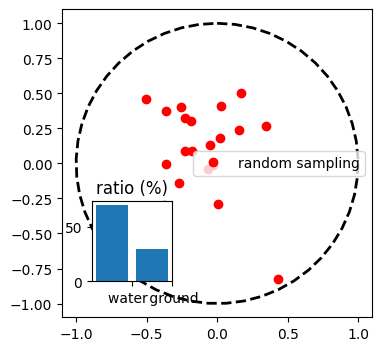

In [54]:
# drawing a random figure on top of your SVG
fig, ax = plt.subplots(1, figsize=(4,4))
ax.plot(np.sin(np.linspace(0,2.*np.pi)), np.cos(np.linspace(0,2.*np.pi)), 'k--', lw=2.)
ax.plot(np.random.randn(20)*.3, np.random.randn(20)*.3, 'ro', label='random sampling')
ax.legend()
ax2 = plt.axes([.2, .2, .2, .2])
ax2.bar([0,1], [70,30])
plt.xticks([0.5,1.5], ['water  ', ' ground'])
plt.yticks([0,50])
plt.title('ratio (%)')
# fig.savefig('cover.svg', transparent=True)
# # here starts the assembling using svgutils 
# sc.Figure("8cm", "8cm", 
#     sc.Panel(sc.SVG("out.svg").scale(0.405).move(36,29)),
#     ).save("compose.svg")
# # SVG('compose.svg')